*1. EDA (Exploratory Data Analysis), primary processing, and data visualization*

In [155]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuj2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuj2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuj2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
df = pd.read_csv('C:\\Users\\anuj2\\Downloads\\movie.csv', engine='python')

In [50]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [51]:
df.shape

(40000, 2)

In [52]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [54]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [55]:
df.duplicated().sum()

277

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.duplicated().sum()

0

In [58]:
df['label'].unique()

array([0, 1], dtype=int64)

In [59]:
(df['label']==1).sum()

19908

In [60]:
(df['label']==0).sum()

19815

In [61]:
label_counts = df['label'].value_counts()
print(label_counts)

label
1    19908
0    19815
Name: count, dtype: int64


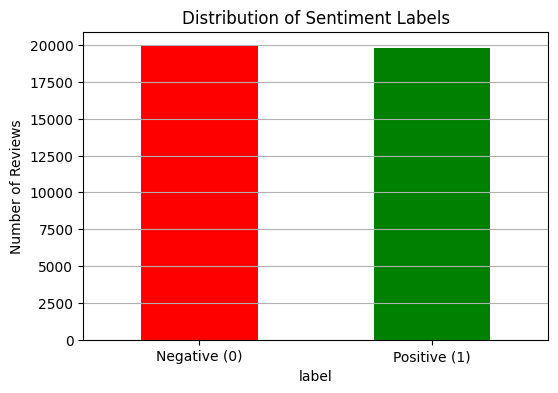

In [62]:
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'], rotation=0)
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Labels')
plt.grid(axis='y')
plt.show()


The graph shows the data is balanced


In [63]:
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))


In [64]:
df['review_length'].head()

0    151
1    326
2    184
3     69
4    178
Name: review_length, dtype: int64

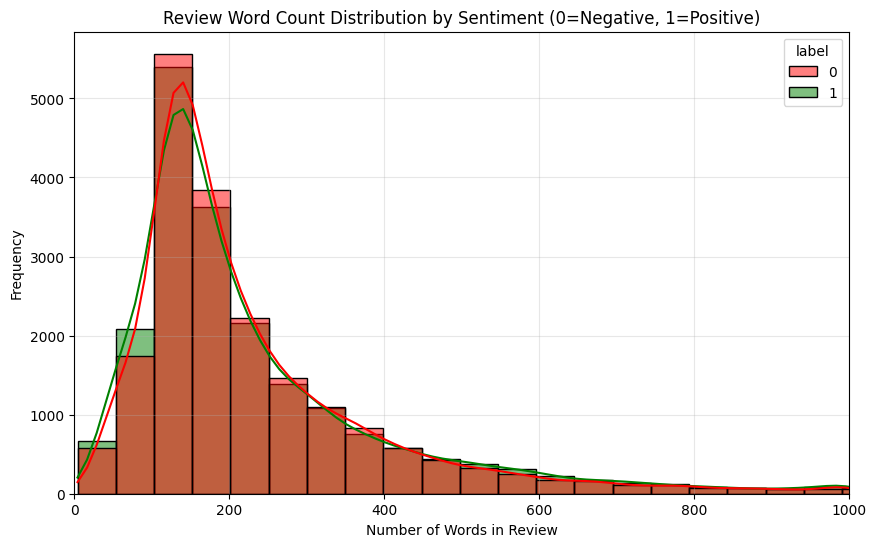


Word Count Statistics by Sentiment:
         count        mean         std   min    25%    50%    75%     max
label                                                                    
0      19815.0  229.319253  164.498482   4.0  128.0  174.0  279.0  1522.0
1      19908.0  233.642907  177.919555  12.0  125.0  173.0  285.0  2470.0


In [65]:
# Visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='label', bins=50, 
             alpha=0.5, kde=True, palette={0: 'red', 1: 'green'})
plt.title('Review Word Count Distribution by Sentiment (0=Negative, 1=Positive)')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Focus on majority of reviews (adjust as needed)
plt.grid(True, alpha=0.3)
plt.show()

# Add statistical summary
print("\nWord Count Statistics by Sentiment:")
print(df.groupby('label')['review_length'].describe())

*2. Data Pre-Processing: Getting the data ready to be fed into the classification algorithms. Which involves cleaning the data for any noise or unnecessary elements.*

In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuj2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [156]:
port_stem = PorterStemmer()

In [157]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [158]:
text = 'HIi @ my name is anuj %% yo kjjashkjf jjhfj * jd'


In [159]:
stemmed_text = stemming(text)
print(stemmed_text)           #woriking fine

hii name anuj yo kjjashkjf jjhfj jd


In [37]:
#stemming all the reviews
df['stemmed_review'] = df['text'].apply(stemming)

In [38]:
df.head()

,text,label,review_length,stemmed_review
0,I grew up (b. 1965) watching and loving the Th...,0,151,grew b watch love thunderbird mate school watc...
1,"When I put this movie in my DVD player, and sa...",0,326,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,184,peopl know particular time past like feel need...
3,Even though I have great interest in Biblical ...,0,69,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,178,im die hard dad armi fan noth ever chang got t...


In [40]:
from google.colab import files

# Save as CSV
df.to_csv("preprocessed_reviews.csv", index=False)

# Download to local machine
files.download("preprocessed_reviews.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
df = pd.read_csv('C:\\Users\\anuj2\\Downloads\\preprocessed_reviews.csv')

In [76]:
X = df['stemmed_review'].values
Y = df['label'].values

In [77]:
print(X)

['grew b watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'
 'put movi dvd player sat coke chip expect hope movi would contain strong point first movi awsom anim good flow stori excel voic cast funni comedi kick ass soundtrack disappoint found atlanti milo return read review first might let follow paragraph direct seen first movi enjoy primarili point mention br br first scene appear shock pick atlanti milo return display case local videoshop whatev expect music feel bad imit first movi voic cast replac fit one

In [78]:
print(Y)

[0 0 0 ... 0 1 1]


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [81]:
print(X.shape, X_train.shape, X_test.shape)

(39723,) (31778,) (7945,)


In [89]:
print(Y_train)

[1 1 1 ... 1 1 1]


In [90]:
print(Y_test)

[1 0 1 ... 0 0 0]


In [82]:
print(X_train)

['tri specul brando attempt best turn oddbal perform insinu mani thing seem anyth much play unfail instinct often seem call attent favor aspect charact other concentr follow turn someth red her turn subtler craftier first appear masteri artific natur might associ method role sky masterson mankiewicz wonder realiz seem tailor begin odd odd still end whatev brando done manag grace mayb consumm grace nonetheless odd come actor limit music abil ever associ music comedi jean simmon also oddli cast quit impress certainli adequ realli delight havana sequenc never less enjoy throughout br br yet perhap actor concentr charact intend seem lover chemistri brought insist brando sky masterson simmon sister sarah respect feed one anoth well enough one see beyond movi outrightli dazzl entertain everyth craft wise dazzl lack would seem someth tact easili overlook much would depend upon true chemistri least partial transform charact chemistri would lend someth posit move final scene one leav film certa

In [83]:
print(X_test)

['huge john denver fan larg collect music vinyl saw christma special origin tv love origin vinyl album cd origin cd later releas later releas miss sever song though see releas year origin song surpris found origin cd sale wow think christma cd would worth much amount worth sell treasur favorit christma cd never abl find vh dvd would love either version anyon one avail pleas let know thank'
 'first thought bad great expect movi give thought bad almost caught hk promot bad star bad movi hk new gener actor actress mention bad script writer bring industri moment im still tri figur gross high normal cant lose movi donni yen ekin forget jacki past peak shouldv figur twin cover cheesi campi corni tri laugh joke effect minim joke recycl funni im sorri bought movi reason peopl think good brainwash hype twin cute everybodi like everyth make good funni like twin date br br sigh miss good hk movi day jet li stephen chow movi domin box offic br br movi mainland china much better shot lower budget'


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
# Using TF-IDF Vectorizer (typically performs well for sentiment analysis)
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of TF-IDF features - Train: {X_train_tfidf.shape}, Test: {X_test_tfidf.shape}")


Shape of TF-IDF features - Train: (31778, 5000), Test: (7945, 5000)


In [86]:
print(X_train_tfidf)

  (0, 4597)	0.035167796309860416
  (0, 527)	0.32876946519629496
  (0, 276)	0.024833605007894808
  (0, 413)	0.01756111708400933
  (0, 4627)	0.08160077064119302
  (0, 3246)	0.018992584982644577
  (0, 2712)	0.017257367010810768
  (0, 4482)	0.016057747909172117
  (0, 3901)	0.15414540791316259
  (0, 192)	0.043803338209400744
  (0, 2924)	0.09041751307986755
  (0, 3314)	0.06569717790713805
  (0, 2306)	0.0439505397990668
  (0, 3095)	0.026034039045071154
  (0, 619)	0.022093949089045432
  (0, 278)	0.029053490789639008
  (0, 1632)	0.03593046936178518
  (0, 250)	0.0299214678968995
  (0, 715)	0.04189366681593379
  (0, 3134)	0.025730561217137002
  (0, 905)	0.07899142651359357
  (0, 1726)	0.02351581947951005
  (0, 4118)	0.055987047187048285
  (0, 3597)	0.03176617914630042
  (0, 2071)	0.04678766577298632
  :	:
  (31777, 4515)	0.036545991514376326
  (31777, 2407)	0.0683634421850065
  (31777, 3996)	0.4395191419111052
  (31777, 990)	0.09475580243656827
  (31777, 4278)	0.08327875201064336
  (31777, 3361)	

In [87]:
print(X_test_tfidf)

  (0, 6)	0.08017003807868436
  (0, 107)	0.13032936264305
  (0, 155)	0.09462096251947717
  (0, 191)	0.06624388645197676
  (0, 297)	0.10016840340687261
  (0, 687)	0.6491664462961705
  (0, 768)	0.3234049200549086
  (0, 852)	0.0953772545566904
  (0, 1368)	0.06985557088044808
  (0, 1414)	0.07340481342314159
  (0, 1610)	0.06350760850033824
  (0, 1633)	0.07964796758770848
  (0, 1678)	0.0549902689628568
  (0, 1759)	0.0669762863477903
  (0, 2163)	0.0837725695751051
  (0, 2413)	0.07502870072544161
  (0, 2493)	0.049156685702874604
  (0, 2523)	0.0899009886037306
  (0, 2528)	0.14242306155808568
  (0, 2582)	0.0659906012991814
  (0, 2658)	0.09586385809737576
  (0, 2853)	0.07092782090814295
  (0, 2924)	0.04486128340611852
  (0, 2938)	0.0623848435445118
  (0, 3000)	0.0516158692735052
  :	:
  (7944, 4500)	0.03880241245467036
  (7944, 4515)	0.03677180999682441
  (7944, 4523)	0.0644079950474078
  (7944, 4538)	0.04811492115634308
  (7944, 4542)	0.08160415919549704
  (7944, 4593)	0.05567899200582666
  (7944

In [88]:
model = LogisticRegression(max_iter = 1000)

In [91]:
model.fit(X_train_tfidf,Y_train)

LogisticRegression(max_iter=1000)

In [97]:
# Predictions
Y_pred = model.predict(X_test_tfidf)
Y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for ROC-AUC


In [98]:
print(Y_pred)

[1 0 1 ... 0 0 0]


In [99]:
print(Y_prob)

[0.85921089 0.07515742 0.80311588 ... 0.01054776 0.35943953 0.15885868]


In [100]:
# 1. Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8816


In [102]:
# 2. ROC-AUC Score
roc_auc = roc_auc_score(Y_test, Y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.9518


In [103]:
# 3. F1 Score
f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8834


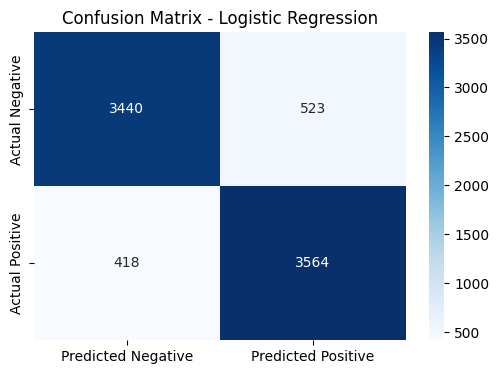

In [104]:
# 4. Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [110]:
import pickle 

In [111]:
file_name = 'trained_model.sav'

In [112]:
pickle.dump(model,open(file_name,'wb'))

In [113]:
loaded_model = pickle.load(open('C:\\Users\\anuj2\\Downloads\\trained_model.sav','rb'))

In [144]:
X_new_tfidf = tfidf.transform(["it was the worst movie i ever watched"])

In [145]:
X_new_dense = X_new_tfidf.toarray()

In [146]:
prediction = loaded_model.predict(X_new_dense)

In [148]:
print(prediction)

[0]


In [149]:
X_new_tfidf = tfidf.transform(["it was the best movie i ever watched"])

In [150]:
X_new_dense = X_new_tfidf.toarray()

In [152]:
prediction = loaded_model.predict(X_new_dense)

In [153]:
print(prediction)

[1]
